In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from feature_selector import FeatureSelector
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
X=pd.read_csv("Triplet.csv",header=None)
y=pd.read_csv("label.csv",header=None)

In [3]:
cv=LeaveOneOut()

In [4]:
data=pd.concat((X,y),axis=1)
data=np.array(data)
print(data.shape)
np.random.seed(612)
np.random.shuffle(data) 
data_X=data[:,0:-1]
data_y=data[:,-1]

(173, 33)


In [5]:
transfer=StandardScaler()
Standard_X=transfer.fit_transform(data_X)  #在该数据集中StandardScaler比MinMaxScaler用的好，数据整体精确度提高
Standard_Y=data_y
print(Standard_X.var())

1.0


In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

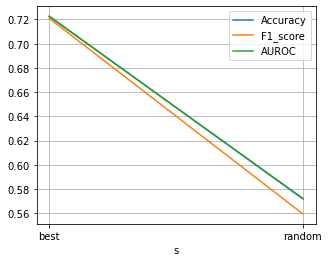

In [7]:
accuracy_a=[]
f1_a=[]
auroc_a=[]
param1=["best","random"]
for i in param1:
    Predict_Y=[]    #存放预测值
    Prob_Y=[]       #存放预测概率
    Really_Y=Standard_Y
    for train_index,test_index in cv.split(Standard_X):
        estimator=DecisionTreeClassifier(random_state=10,splitter=i)
        estimator.fit(Standard_X[train_index],Standard_Y[train_index])
        Predict_Y.append(estimator.predict(Standard_X[test_index])[0])
        Prob_Y.append(estimator.predict_proba(Standard_X[test_index]))
    Prob_Y=np.array(Prob_Y)  #将Prob_Y改为numpy数组形式
    Prob_Y=Prob_Y.reshape(173,2)  #原本是(173,1,2)形状，改为（173,2）形状
    import pandas as pd
    Prob_Y=pd.DataFrame(Prob_Y)
    Prob_Y.columns=["0","1"]
    confusion_matrix(Really_Y,Predict_Y)
    ACC=accuracy_score(Really_Y,Predict_Y)
    F1_score=f1_score(Really_Y,Predict_Y)
    AUC=roc_auc_score(Really_Y,np.array(Prob_Y["1"]))
    accuracy_a.append(ACC)
    f1_a.append(F1_score)
    auroc_a.append(AUC)
plt.figure(figsize=(5,4))
plt.plot(param1,accuracy_a,label="Accuracy")
plt.plot(param1,f1_a,label="F1_score")
plt.plot(param1,auroc_a,label="AUROC")
plt.xlabel("s")
plt.legend()
plt.grid()
plt.show()

In [8]:
accuracy_b=[]
f1_b=[]
auroc_b=[]
param2=np.array(range(3,10,1))
for i in param2:
    Predict_Y=[]    #存放预测值
    Prob_Y=[]       #存放预测概率
    Really_Y=Standard_Y
    for train_index,test_index in cv.split(Standard_X):
        estimator=DecisionTreeClassifier(splitter="best",random_state=10,max_depth=i)
        estimator.fit(Standard_X[train_index],Standard_Y[train_index])
        Predict_Y.append(estimator.predict(Standard_X[test_index])[0])
        Prob_Y.append(estimator.predict_proba(Standard_X[test_index]))
    Prob_Y=np.array(Prob_Y)  #将Prob_Y改为numpy数组形式
    Prob_Y=Prob_Y.reshape(173,2)  #原本是(173,1,2)形状，改为（173,2）形状
    import pandas as pd
    Prob_Y=pd.DataFrame(Prob_Y)
    Prob_Y.columns=["0","1"]
    confusion_matrix(Really_Y,Predict_Y)
    ACC=accuracy_score(Really_Y,Predict_Y)
    F1_score=f1_score(Really_Y,Predict_Y)
    AUC=roc_auc_score(Really_Y,np.array(Prob_Y["1"]))
    accuracy_b.append(ACC)
    f1_b.append(F1_score)
    auroc_b.append(AUC)

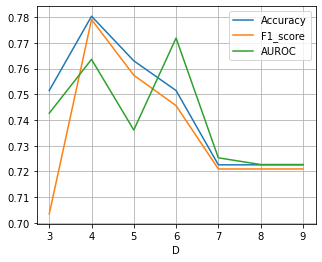

In [9]:
plt.figure(figsize=(5,4))
plt.plot(param2,accuracy_b,label="Accuracy")
plt.plot(param2,f1_b,label="F1_score")
plt.plot(param2,auroc_b,label="AUROC")
plt.xlabel("D")
plt.legend()
plt.grid()
plt.show()

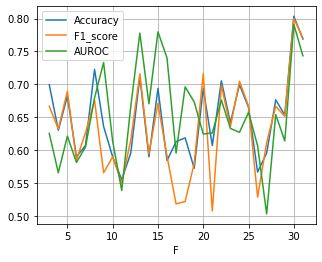

In [11]:
accuracy_c=[]
f1_c=[]
auroc_c=[]
param3=Standard_X.shape[1]
for i in np.array(range(3,param3,1)):
    Predict_Y=[]    #存放预测值
    Prob_Y=[]       #存放预测概率
    Really_Y=Standard_Y
    for train_index,test_index in cv.split(Standard_X):
        estimator=DecisionTreeClassifier(splitter="best",random_state=10,max_depth=4,max_features=i)
        estimator.fit(Standard_X[train_index],Standard_Y[train_index])
        Predict_Y.append(estimator.predict(Standard_X[test_index])[0])
        Prob_Y.append(estimator.predict_proba(Standard_X[test_index]))
    Prob_Y=np.array(Prob_Y)  #将Prob_Y改为numpy数组形式
    Prob_Y=Prob_Y.reshape(173,2)  #原本是(173,1,2)形状，改为（173,2）形状
    import pandas as pd
    Prob_Y=pd.DataFrame(Prob_Y)
    Prob_Y.columns=["0","1"]
    confusion_matrix(Really_Y,Predict_Y)
    ACC=accuracy_score(Really_Y,Predict_Y)
    F1_score=f1_score(Really_Y,Predict_Y)
    AUC=roc_auc_score(Really_Y,np.array(Prob_Y["1"]))
    accuracy_c.append(ACC)
    f1_c.append(F1_score)
    auroc_c.append(AUC)

plt.figure(figsize=(5,4))
plt.plot(np.array(range(3,param3,1)),accuracy_c,label="Accuracy")
plt.plot(np.array(range(3,param3,1)),f1_c,label="F1_score")
plt.plot(np.array(range(3,param3,1)),auroc_c,label="AUROC")
plt.xlabel("F")
plt.legend()
plt.grid()
plt.show()

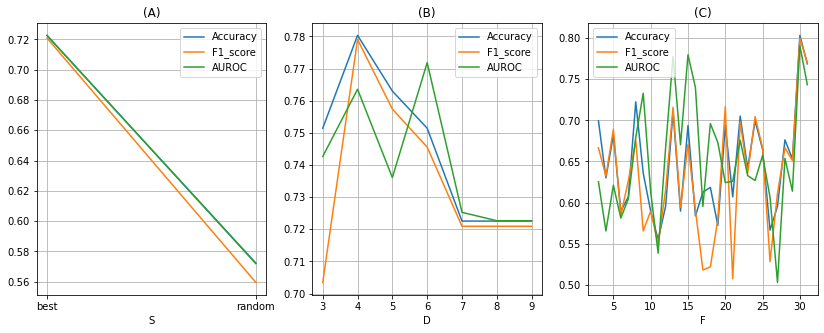

In [13]:
plt.figure(figsize=(14,5))
#plt.title('Mismatch')

plt.subplot(131)
#plt.figure(figsize=(5,4))
plt.plot(param1,accuracy_a,label="Accuracy")
plt.plot(param1,f1_a,label="F1_score")
plt.plot(param1,auroc_a,label="AUROC")
plt.xlabel("S")
plt.legend()
plt.title('(A)')
plt.grid()
#plt.show()
plt.subplot(132)
#plt.figure(figsize=(5,4))
plt.plot(param2,accuracy_b,label="Accuracy")
plt.plot(param2,f1_b,label="F1_score")
plt.plot(param2,auroc_b,label="AUROC")
plt.xlabel("D")
plt.legend()
plt.title('(B)')
plt.grid()


plt.subplot(133)
#plt.figure(figsize=(5,4))
plt.plot(np.array(range(3,param3,1)),accuracy_c,label="Accuracy")
plt.plot(np.array(range(3,param3,1)),f1_c,label="F1_score")
plt.plot(np.array(range(3,param3,1)),auroc_c,label="AUROC")
plt.xlabel("F")
plt.legend()
plt.grid()
plt.title('(C)')

#plt.show()

plt.savefig("./5.tif",dpi=300)
plt.savefig("./5.svg",dpi=300)
plt.savefig("./5.png",dpi=300)